In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import confusion_matrix , classification_report
from keras.utils import to_categorical
from PIL import Image

In [2]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:

y = data['label']
x = data.drop(columns = ['label'])
#get x_train ,y_train
x.shape

(10015, 2352)

In [4]:
other = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
other.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
classes = {
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           1:('bcc' , ' basal cell carcinoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'),  
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           6: ('mel', 'melanoma')
           }

Text(0.5, 1.0, 'Frequency Distribution of Classes')

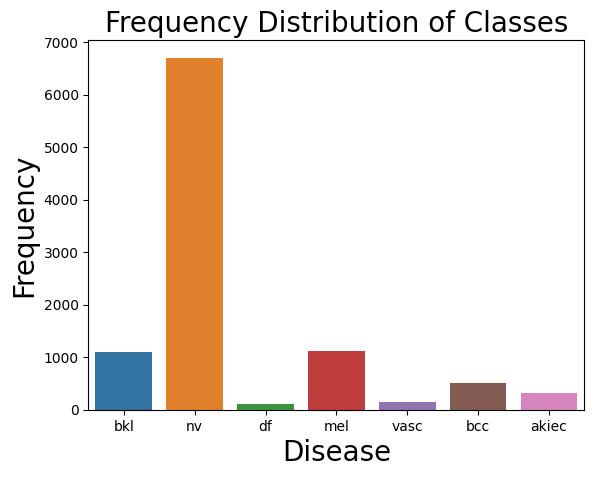

In [6]:
sns.countplot(x = 'dx', data = other)
plt.xlabel('Disease', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency Distribution of Classes', size=20)

In [7]:
k = y.map(classes.get) 
k.value_counts() < 1000, k.value_counts() > 5000,k.value_counts()

(label
 (nv,  melanocytic nevi)                                      False
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  basal cell carcinoma)                                  True
 (akiec, Actinic keratoses and intraepithelial carcinomae)     True
 (vasc,  pyogenic granulomas and hemorrhage)                   True
 (df, dermatofibroma)                                          True
 Name: count, dtype: bool,
 label
 (nv,  melanocytic nevi)                                       True
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  basal cell carcinoma)                                 False
 (akiec, Actinic keratoses and intraepithelial carcinomae)    False
 (vasc,  pyogenic granulomas and hemorrhage)                  False
 (df, dermatofibroma)                                         False
 Name: 

Text(0.5, 1.0, 'Gender of Patient')

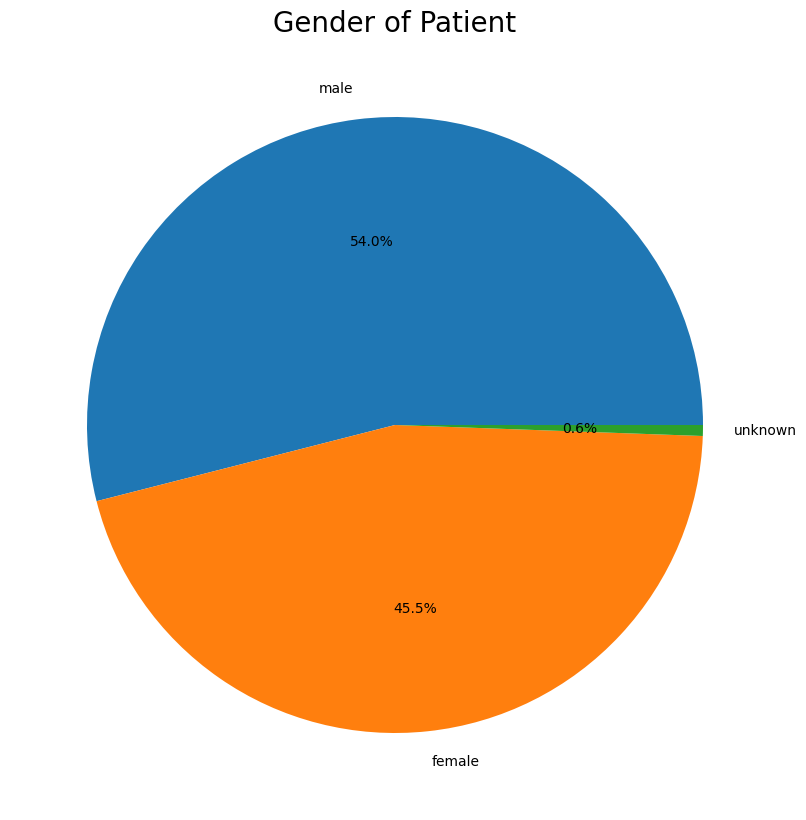

In [8]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(other['sex'].value_counts(), 
        labels = other['sex'].value_counts().index, 
        autopct="%.1f%%")
plt.title('Gender of Patient', size=20)

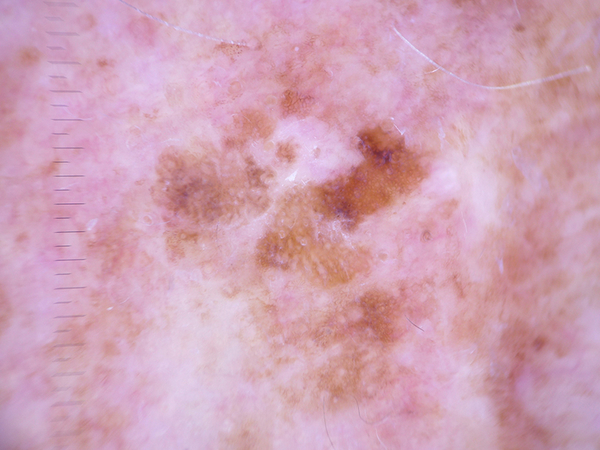

In [9]:
Image.open('../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027419.jpg')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Age of Patients')

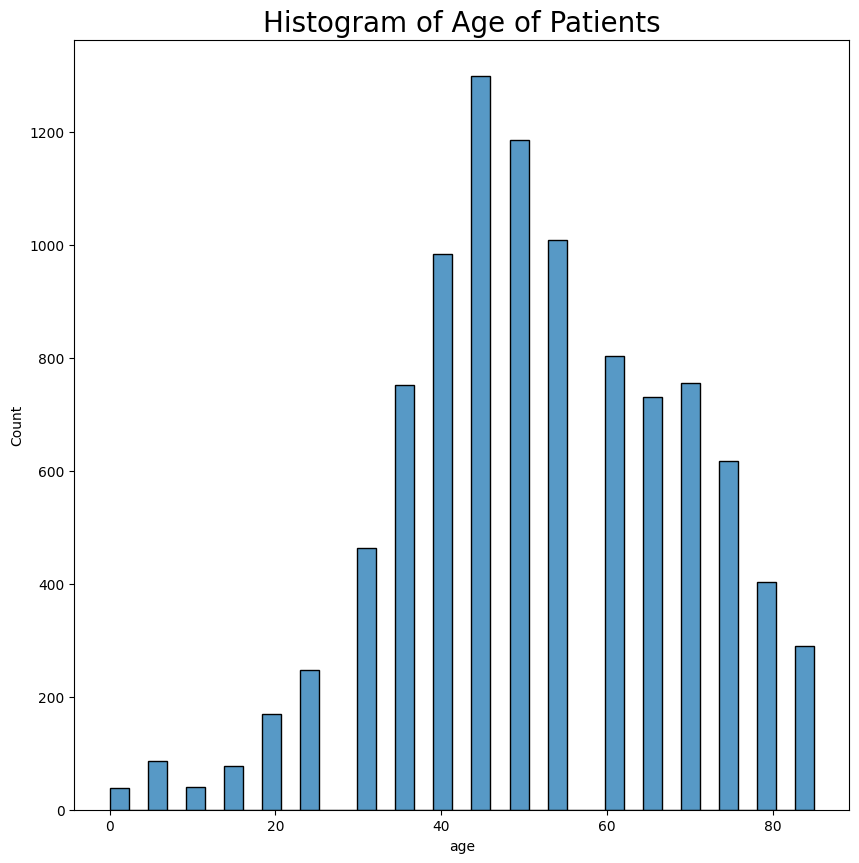

In [10]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(other['age'])
plt.title('Histogram of Age of Patients', size=20)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

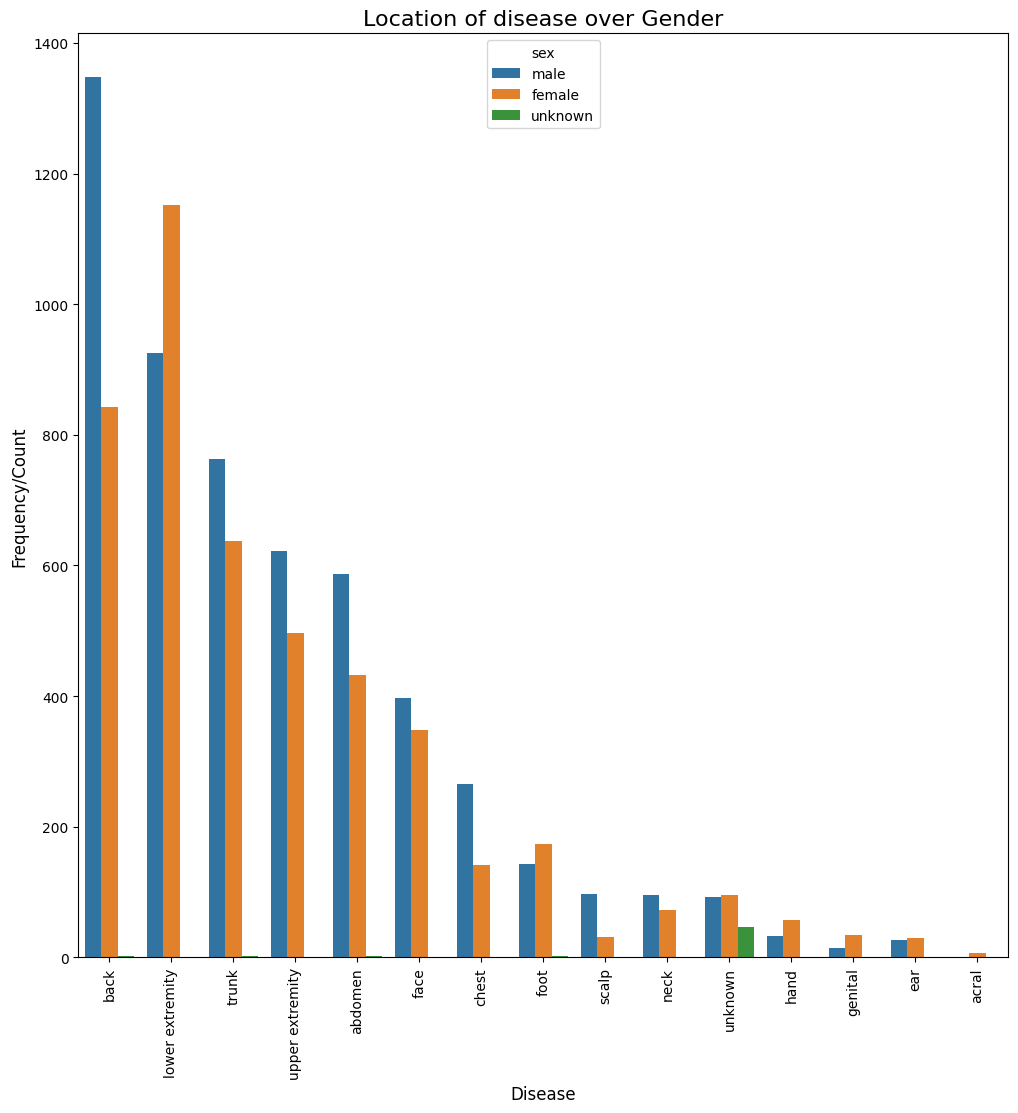

In [11]:
value = other[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [12]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
x = np.array(x).reshape(-1,28,28,3)
print('Shape of Data :',x.shape)

Shape of Data : (46935, 28, 28, 3)


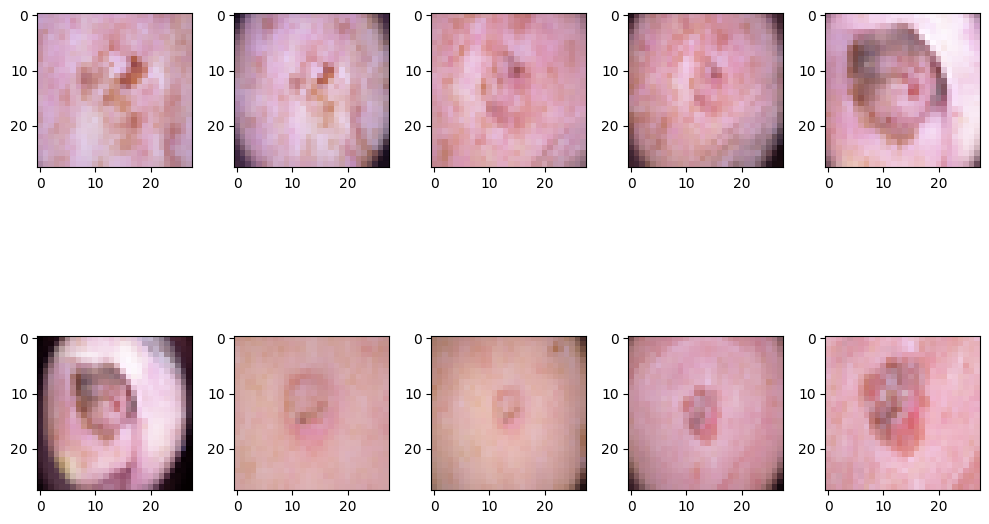

In [13]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [14]:
x = (x-np.mean(x))/np.std(x)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

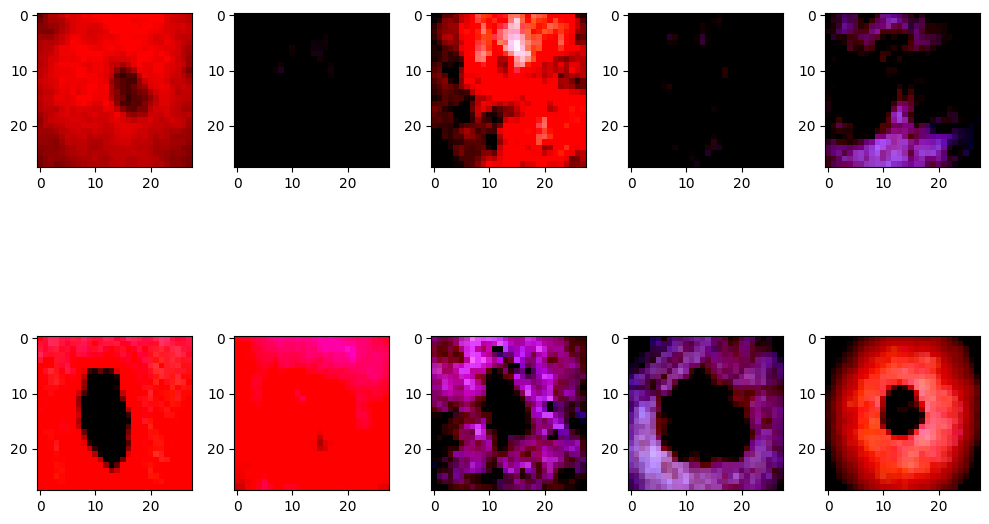

In [16]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

# **#CNN**

In [17]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

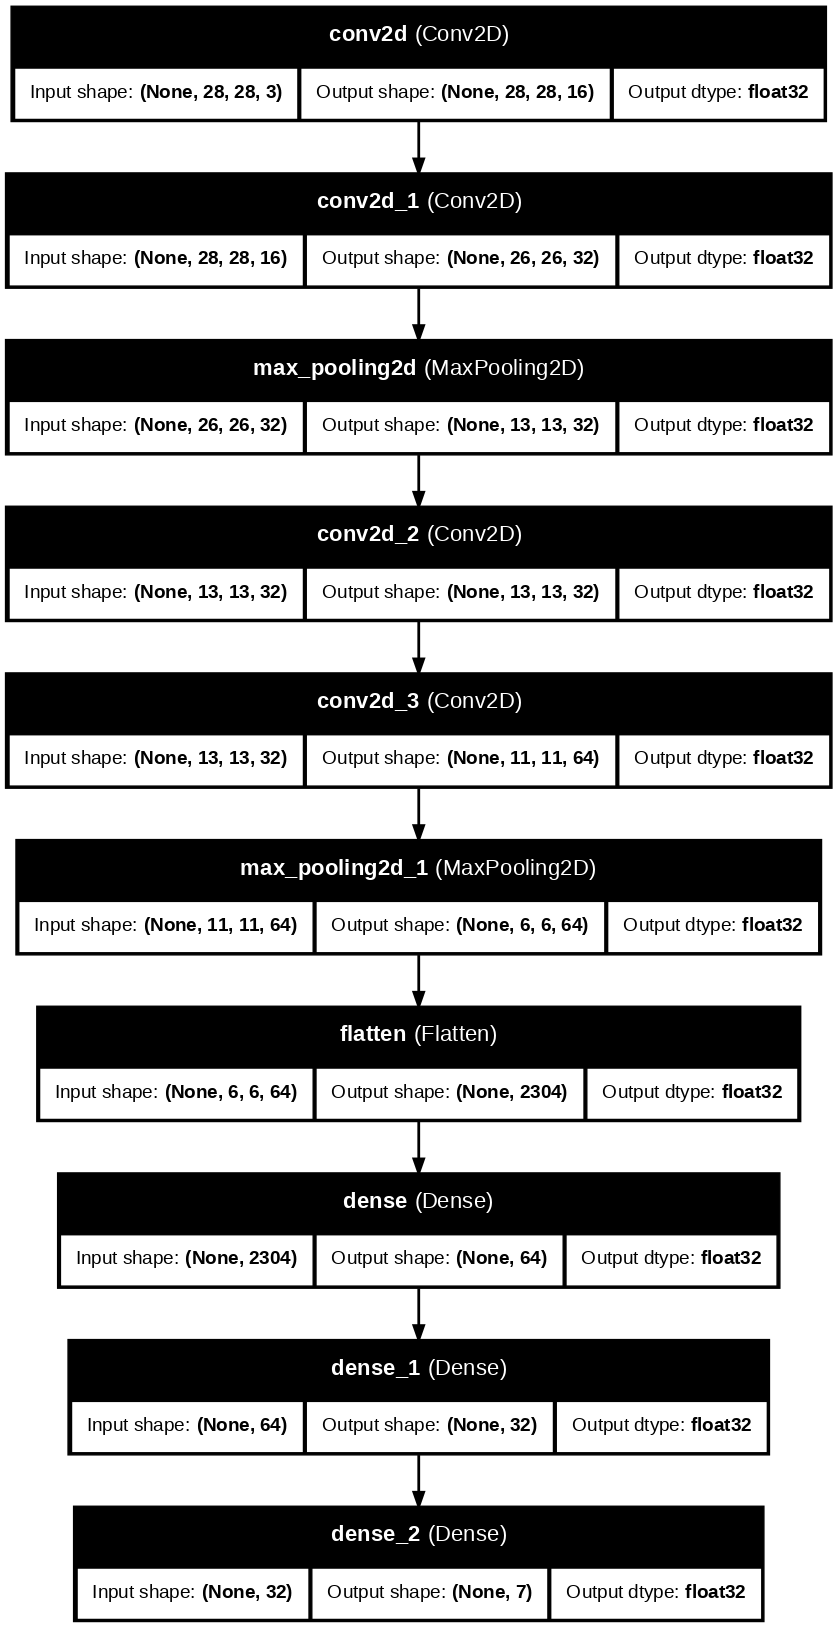

In [18]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", expand_nested = True, dpi = 100) # ,to_file='model.png')

In [19]:
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                                  monitor='val_loss', mode='max',
                                                 verbose=0)
File = 'SkinDiseases'
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format(File))]

In [20]:
import time
import joblib
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# ⏳ Start time tracking for training
start_train = time.time()

# ✅ Early stopping to prevent overfitting
callback = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

# ✅ Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ✅ Train the Model
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    batch_size=224,
    epochs=50,
    callbacks=[callback],
    verbose=1
)

# ⏳ End time tracking for training
end_train = time.time()
train_time = end_train - start_train

# ✅ Save the trained CNN model as a pickle file (.pkl)
joblib.dump(model, "cnn_model.pkl")
print("CNN model saved successfully as 'cnn_model.pkl'!")





Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.3521 - loss: 1.6029 - val_accuracy: 0.6364 - val_loss: 1.0181
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6660 - loss: 0.9060 - val_accuracy: 0.7517 - val_loss: 0.6835
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7934 - loss: 0.5727 - val_accuracy: 0.7692 - val_loss: 0.6194
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8350 - loss: 0.4554 - val_accuracy: 0.8517 - val_loss: 0.4272
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8864 - loss: 0.3281 - val_accuracy: 0.8346 - val_loss: 0.4382
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8884 - loss: 0.3061 - val_accuracy: 0.8937 - val_loss: 0.3215
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9254 - loss: 0.2120 - val_accuracy: 0.9204 - val_loss: 0.2411
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9364 - loss: 0.1828 - val_accuracy: 0

In [21]:
# ⏳ Start time tracking for loading
start_load = time.time()

# ✅ Load the saved CNN model
loaded_model = joblib.load("cnn_model.pkl")
print("CNN model loaded successfully!")

# ⏳ End time tracking for loading
end_load = time.time()
load_time = end_load - start_load

CNN model loaded successfully!


In [22]:
# ⏳ Start time tracking for testing
start_test = time.time()

# ✅ Evaluate the model on test set
test_loss, test_acc = loaded_model.evaluate(X_test, Y_test, verbose=0)

# ⏳ End time tracking for testing
end_test = time.time()
test_time = end_test - start_test

# ✅ Print Training, Loading & Test Accuracy & Time
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_acc:.2f}")
print(f"Final Validation Accuracy: {val_acc:.2f}")
print(f"Total Training Time: {train_time:.2f} seconds ({train_time/60:.2f} minutes)")
print(f"Model Loading Time: {load_time:.2f} seconds")
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Total Testing Time: {test_time:.2f} seconds ({test_time/60:.2f} minutes)")


Final Training Accuracy: 0.97
Final Validation Accuracy: 0.96
Total Training Time: 29.29 seconds (0.49 minutes)
Model Loading Time: 0.21 seconds
Test Accuracy: 0.97
Total Testing Time: 2.35 seconds (0.04 minutes)


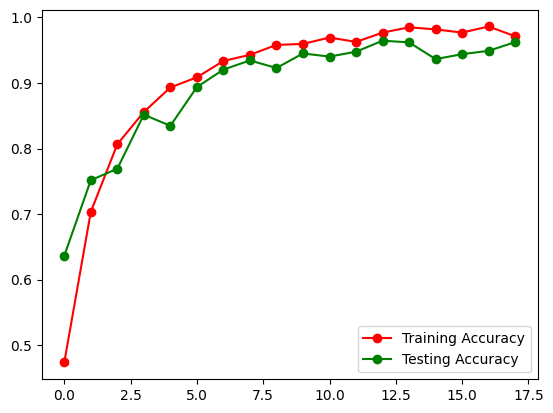

In [23]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

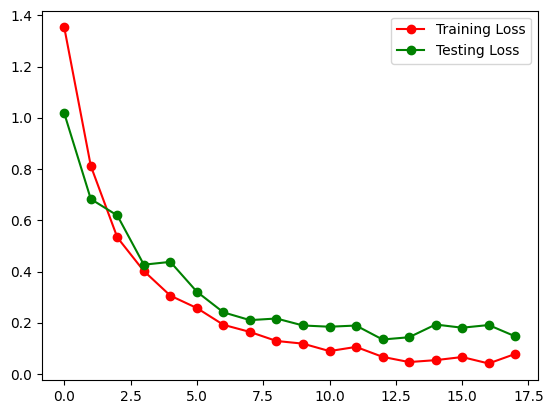

In [24]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [25]:
#convert to one-hot
Y_train_1hot = to_categorical(Y_train)
Y_test_1hot = to_categorical(Y_test)

In [26]:
Y_pred  = model.predict(X_test).round()

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(Y_test_1hot , Y_pred , target_names =target_names ))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       1.00      0.98      0.99      1295
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      0.99      1323
                     ('bkl', 'benign keratosis-like lesions')       0.93      0.98      0.95      1351
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1392
                                  ('nv', ' melanocytic nevi')       0.96      0.82      0.88      1346
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      0.99      0.99      1292
                                          ('mel', 'melanoma')       0.91      0.97      0.94      1388

                                                    micro avg       0.97      0.96      0.96      9387
                                                    macro avg       0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

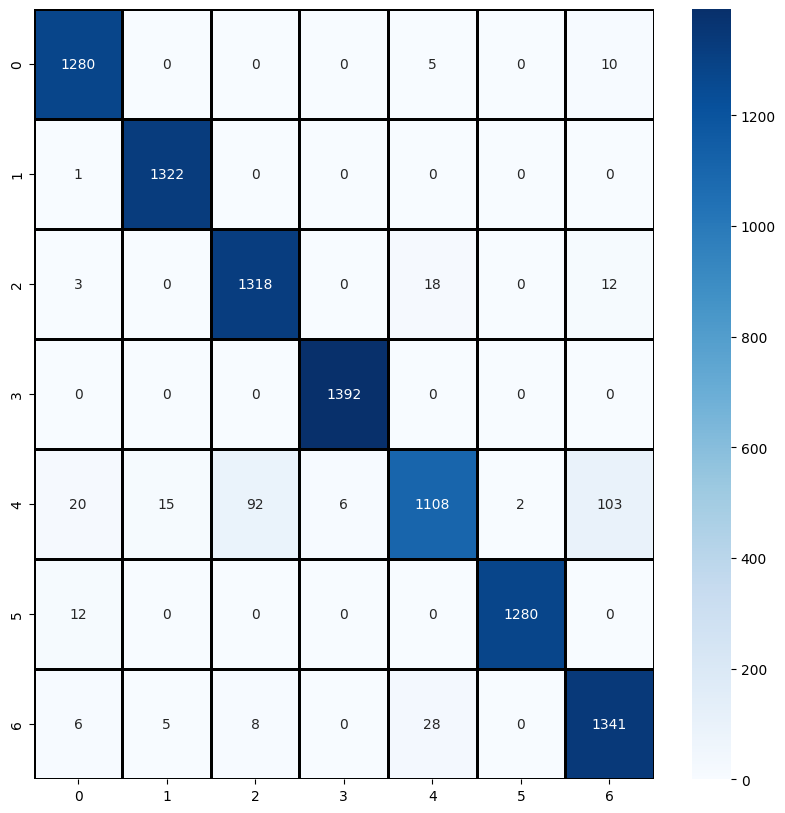

In [28]:
cm = confusion_matrix(Y_test_1hot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = [i for i in range(7)] , columns = [i for i in range(7)])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [29]:
import time
import joblib
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# ✅ Flatten the image dataset for CatBoost
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# ✅ Initialize CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=1000, 
    depth=6, 
    learning_rate=0.1, 
    loss_function='MultiClass', 
    verbose=100
)

# ⏳ Start training time
start_train = time.time()

# ✅ Train the model
cat_model.fit(X_train_flat, Y_train)

# ⏳ End training time
end_train = time.time()
train_time = end_train - start_train

# ✅ Save the trained model as a pickle file (.pkl)
joblib.dump(cat_model, "catboost_model.pkl")
print("CatBoost model saved successfully as 'catboost_model.pkl'!")

# ✅ Load the saved model
loaded_cat_model = joblib.load("catboost_model.pkl")
print("CatBoost model loaded successfully!")



0:	learn: 1.8595928	total: 2.98s	remaining: 49m 40s
100:	learn: 0.6875829	total: 3m 22s	remaining: 29m 59s
200:	learn: 0.4534661	total: 6m 26s	remaining: 25m 36s
300:	learn: 0.3563491	total: 9m 24s	remaining: 21m 51s
400:	learn: 0.2933331	total: 12m 23s	remaining: 18m 30s
500:	learn: 0.2414884	total: 15m 26s	remaining: 15m 22s
600:	learn: 0.2091192	total: 18m 23s	remaining: 12m 12s
700:	learn: 0.1824954	total: 21m 22s	remaining: 9m 7s
800:	learn: 0.1634205	total: 24m 18s	remaining: 6m 2s
900:	learn: 0.1447645	total: 27m 19s	remaining: 3m
999:	learn: 0.1301415	total: 30m 16s	remaining: 0us
CatBoost model saved successfully as 'catboost_model.pkl'!
CatBoost model loaded successfully!


In [31]:
# Predict on the training set
y_train_pred = cat_model.predict(X_train_flat)

# Compute training accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)




In [32]:
# ⏳ Start testing time
start_test = time.time()

# ✅ Predict on test set using the loaded model
y_pred = loaded_cat_model.predict(X_test_flat)
y_pred = y_pred.flatten()  # Ensure correct shape

# ⏳ End testing time
end_test = time.time()
test_time = end_test - start_test

# ✅ Compute and print test accuracy
catboost_acc = accuracy_score(Y_test, y_pred)

# ✅ Print Results

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f"Test Accuracy (Loaded CatBoost Model): {catboost_acc:.2f}")
print(f"Total Training Time: {train_time:.2f} seconds ({train_time/60:.2f} minutes)")
print(f"Total Testing Time: {test_time:.2f} seconds ({test_time/60:.2f} minutes)")


Training Accuracy: 98.81%
Test Accuracy (Loaded CatBoost Model): 0.97
Total Training Time: 1845.36 seconds (30.76 minutes)
Total Testing Time: 6.72 seconds (0.11 minutes)


In [33]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

# ✅ Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=[
    'akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'  # HAM10000 classes
]))

# ✅ AUC-ROC Score
# Ensure y_pred_proba is the probability predictions from the model
y_proba = loaded_cat_model.predict_proba(X_test_flat)

# Multiclass AUC-ROC (OvR)
if len(np.unique(Y_test)) > 2:  # Multi-class case
    roc_auc = roc_auc_score(Y_test, y_proba, multi_class='ovr')
else:  # Binary case (not usual for HAM10000)
    roc_auc = roc_auc_score(Y_test, y_proba[:, 1])

print(f"AUC-ROC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

       akiec       0.98      1.00      0.99      1295
         bcc       0.96      1.00      0.98      1323
         bkl       0.93      0.97      0.95      1351
          df       1.00      1.00      1.00      1392
         mel       0.96      0.83      0.89      1346
          nv       1.00      1.00      1.00      1292
        vasc       0.93      0.97      0.95      1388

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387

AUC-ROC Score: 1.00
